## 이진분류 예제
# 영화 리뷰 긍정부정

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

## 데이터 준비
### 신경망에 숫자 리스트를 주입할 수 없음. 리스트 -> 텐서로 바꾸는 두가지 방법
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 반환
- 리스트를 원 핫 인코딩하여 0과 1의 벡터로 변환

#### 정수시퀀스를 이진 행렬로 인코딩 하기
- 데이터를 직접 One - hot vector로 만듬

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 정의하기

In [30]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 손실함수와 옵티마이저 정의

In [32]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 옵티마이저 설정하기
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 손실과 측정을 함수 객체로 지정하기
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [47]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련검증
- 훈련하는 동안 처음보는 데이터에 대한 모델의 정확도를 측정
- 원본 훈련 데이터에서 10000개의 샘플을 떼어 검증세트 생성

### 검증세트 준비하기

In [48]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0041 - acc: 0.9992 - val_loss: 1.1205 - val_acc: 0.8613
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 1.1565e-05 - acc: 1.0000 - val_loss: 1.1245 - val_acc: 0.8609
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 7.2242e-06 - acc: 1.0000 - val_loss: 1.1267 - val_acc: 0.8602
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 5.4735e-06 - acc: 1.0000 - val_loss: 1.1337 - val_acc: 0.8587
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 4.1907e-06 - acc: 1.0000 - val_loss: 1.1488 - val_acc: 0.8594
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 2.7998e-06 - acc: 1.0000 - val_loss: 1.1793 - val_acc: 0.8609
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 6.4550e-04 - acc: 0.99

### 훈련과 검증 손실 그리기

In [50]:
import matplotlib.pyplot as plt

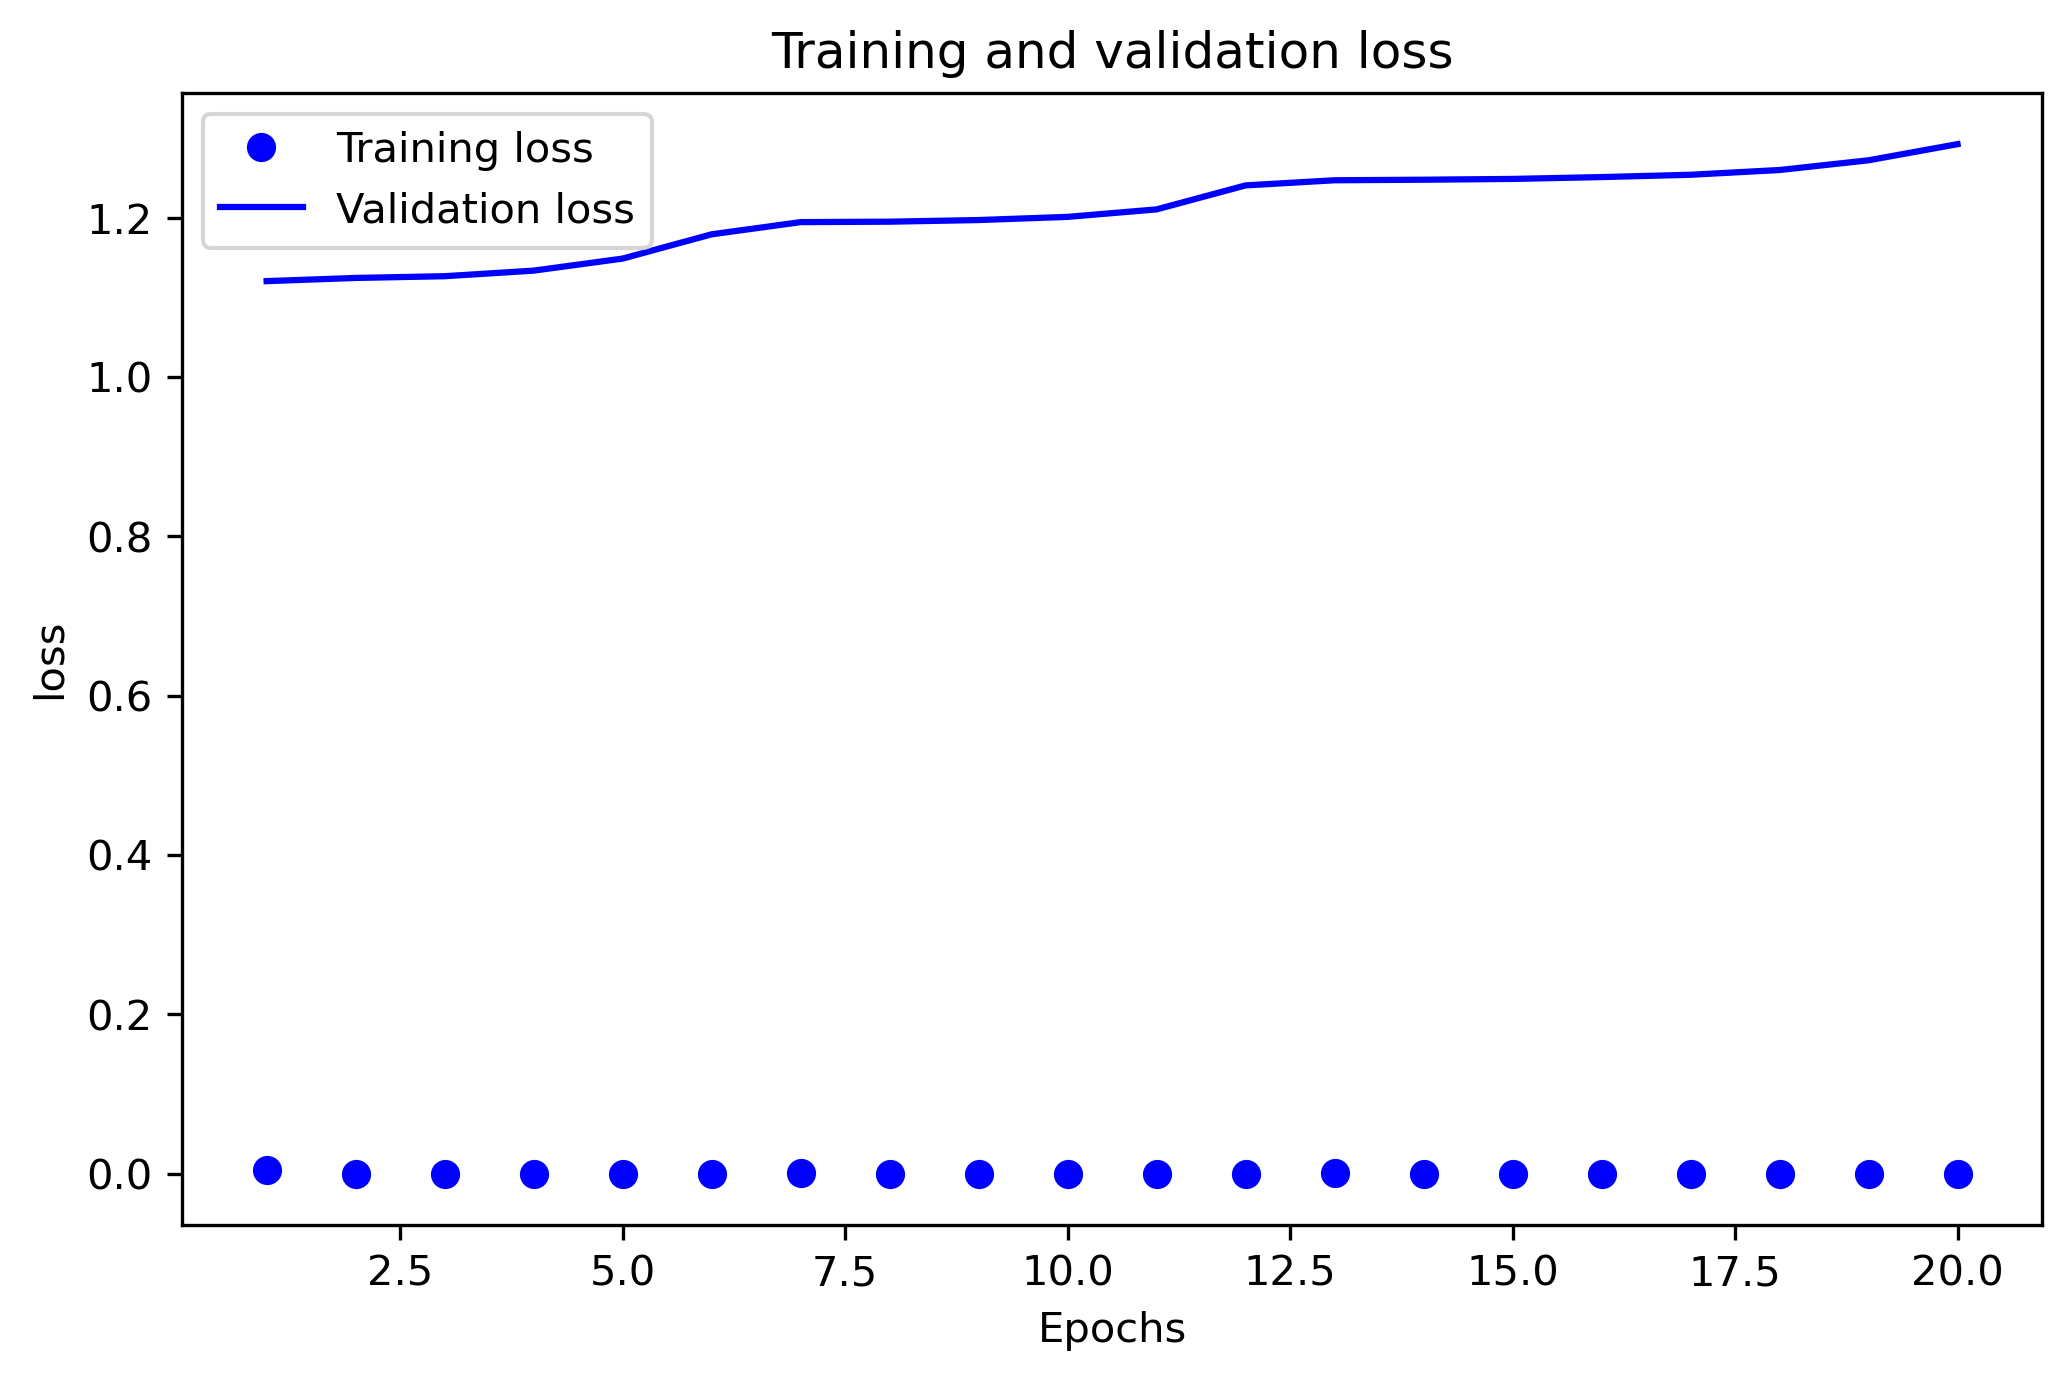

In [51]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

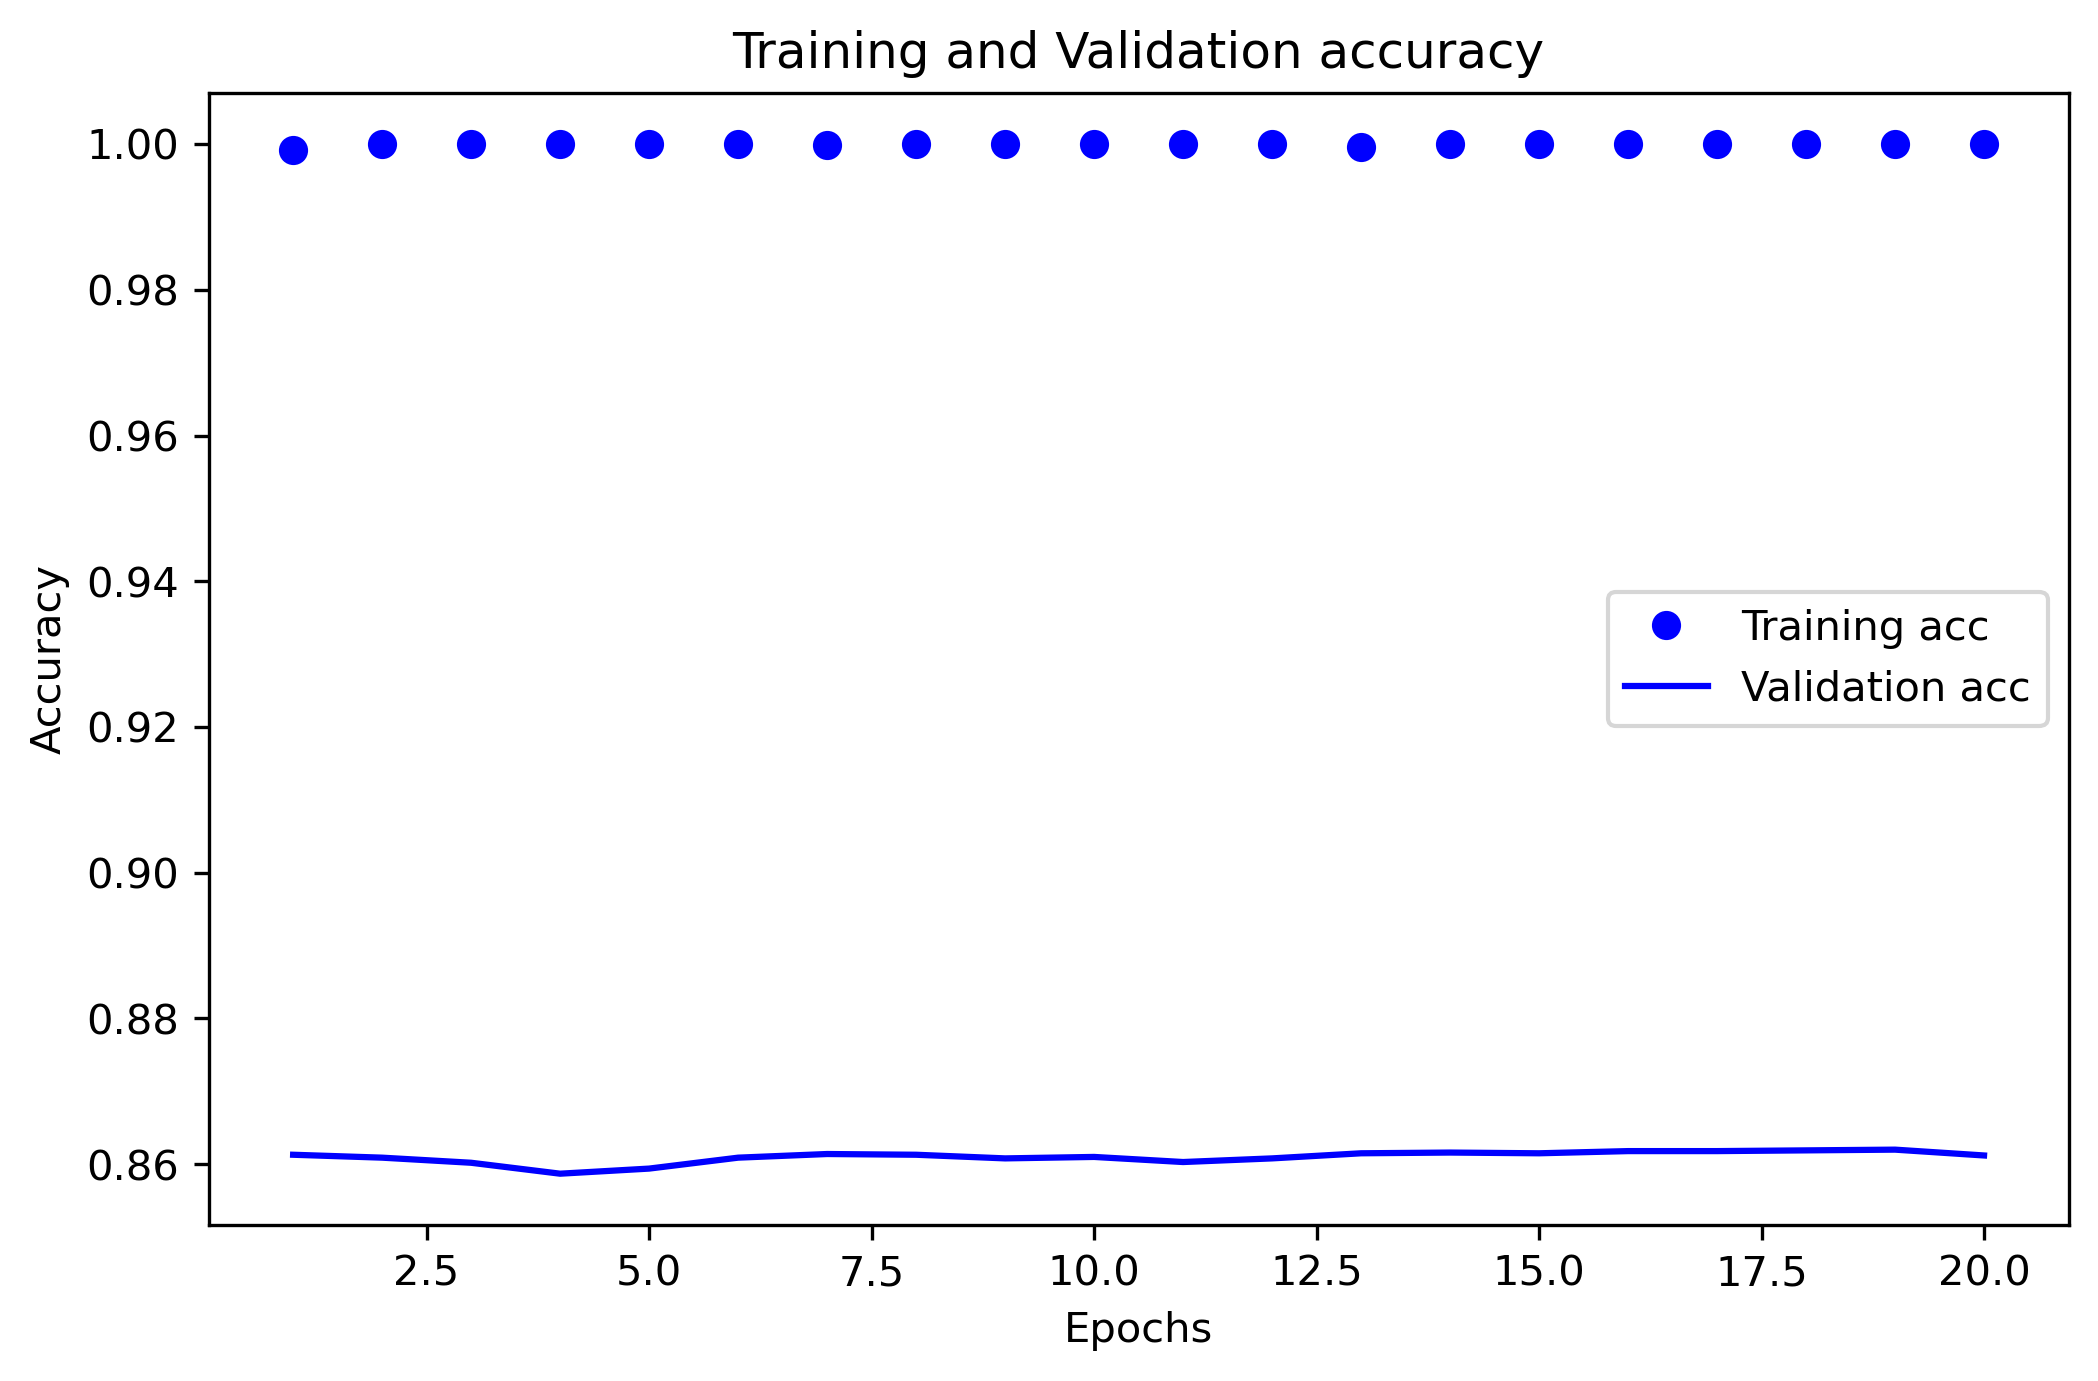

In [53]:
### 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 모델을 처음부터 다시 훈련하기

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.5004 - acc: 0.7959
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2843 - acc: 0.9037
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2128 - acc: 0.9242
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step


In [59]:
results

[0.28758018980026245, 0.88564]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [61]:
model.predict(x_test)

array([[0.22547284],
       [0.9986861 ],
       [0.9528276 ],
       ...,
       [0.13417637],
       [0.08066222],
       [0.51429427]], dtype=float32)

### 추가실험
- 은닉층 변경
- 층의 유닛 변경
- binary_crossentropy 이외의 손실 함수 사용
- relu 대신 tanh 활성화 함수 사용

In [67]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
25000/25000 [==============================] - 2s 89us/step - loss: 0.4346 - acc: 0.8083
Epoch 2/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.2403 - acc: 0.9080
Epoch 3/20
25000/25000 [==============================] - 2s 77us/step - loss: 0.1907 - acc: 0.9278
Epoch 4/20
25000/25000 [==============================] - 2s 77us/step - loss: 0.1496 - acc: 0.9433
Epoch 5/20
25000/25000 [==============================] - 2s 78us/step - loss: 0.1274 - acc: 0.9511
Epoch 6/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.1020 - acc: 0.9628
Epoch 7/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.0814 - acc: 0.9710
Epoch 8/20
25000/25000 [==============================] - 2s 77us/step - loss: 0.0672 - acc: 0.9777
Epoch 9/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.0500 - acc: 0.9848
Epoch 10/20
25000/25000 [==============================] - 2s 76us/step - loss: 0.0338 - acc: 0.9904

In [68]:
results

[1.1592856267116964, 0.85352]

## Summary
- 원본데이터를 신경망에 텐서로 주입하기 위해 전처리 필요
- relu 활성화 함수와 Dense
- 이진분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense로 끝나야함
- 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값
- 이진 분류 문제에서 시그모이드 출력에 사용할 손실 함수는 binary_crossentropy
- rmsprop 옵티마이전느 문제에 상관없이 일반적으로 좋은 선택